In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [3]:
df=pd.read_csv('Component Gain Erdos.csv+20')
df.columns

Index(['Unnamed: 0', 'Total Nodes', 'Entry Nodes', 'Target Nodes',
       'Global Cut', 'Span Cut', 'Edge Value Global', ' Max Edge Value Comp',
       'Fraction'],
      dtype='object')

In [4]:
lens=df.shape[0]
iters=40
list_val=[]
stop=True
while stop:
    for j in np.linspace(0.1,0.7,7):
        holder =[]
        for i in range(iters):
            holder.append(j)
        if len(list_val)>=lens:
            stop=False
            break
        list_val.extend(holder)
list_val

[0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5

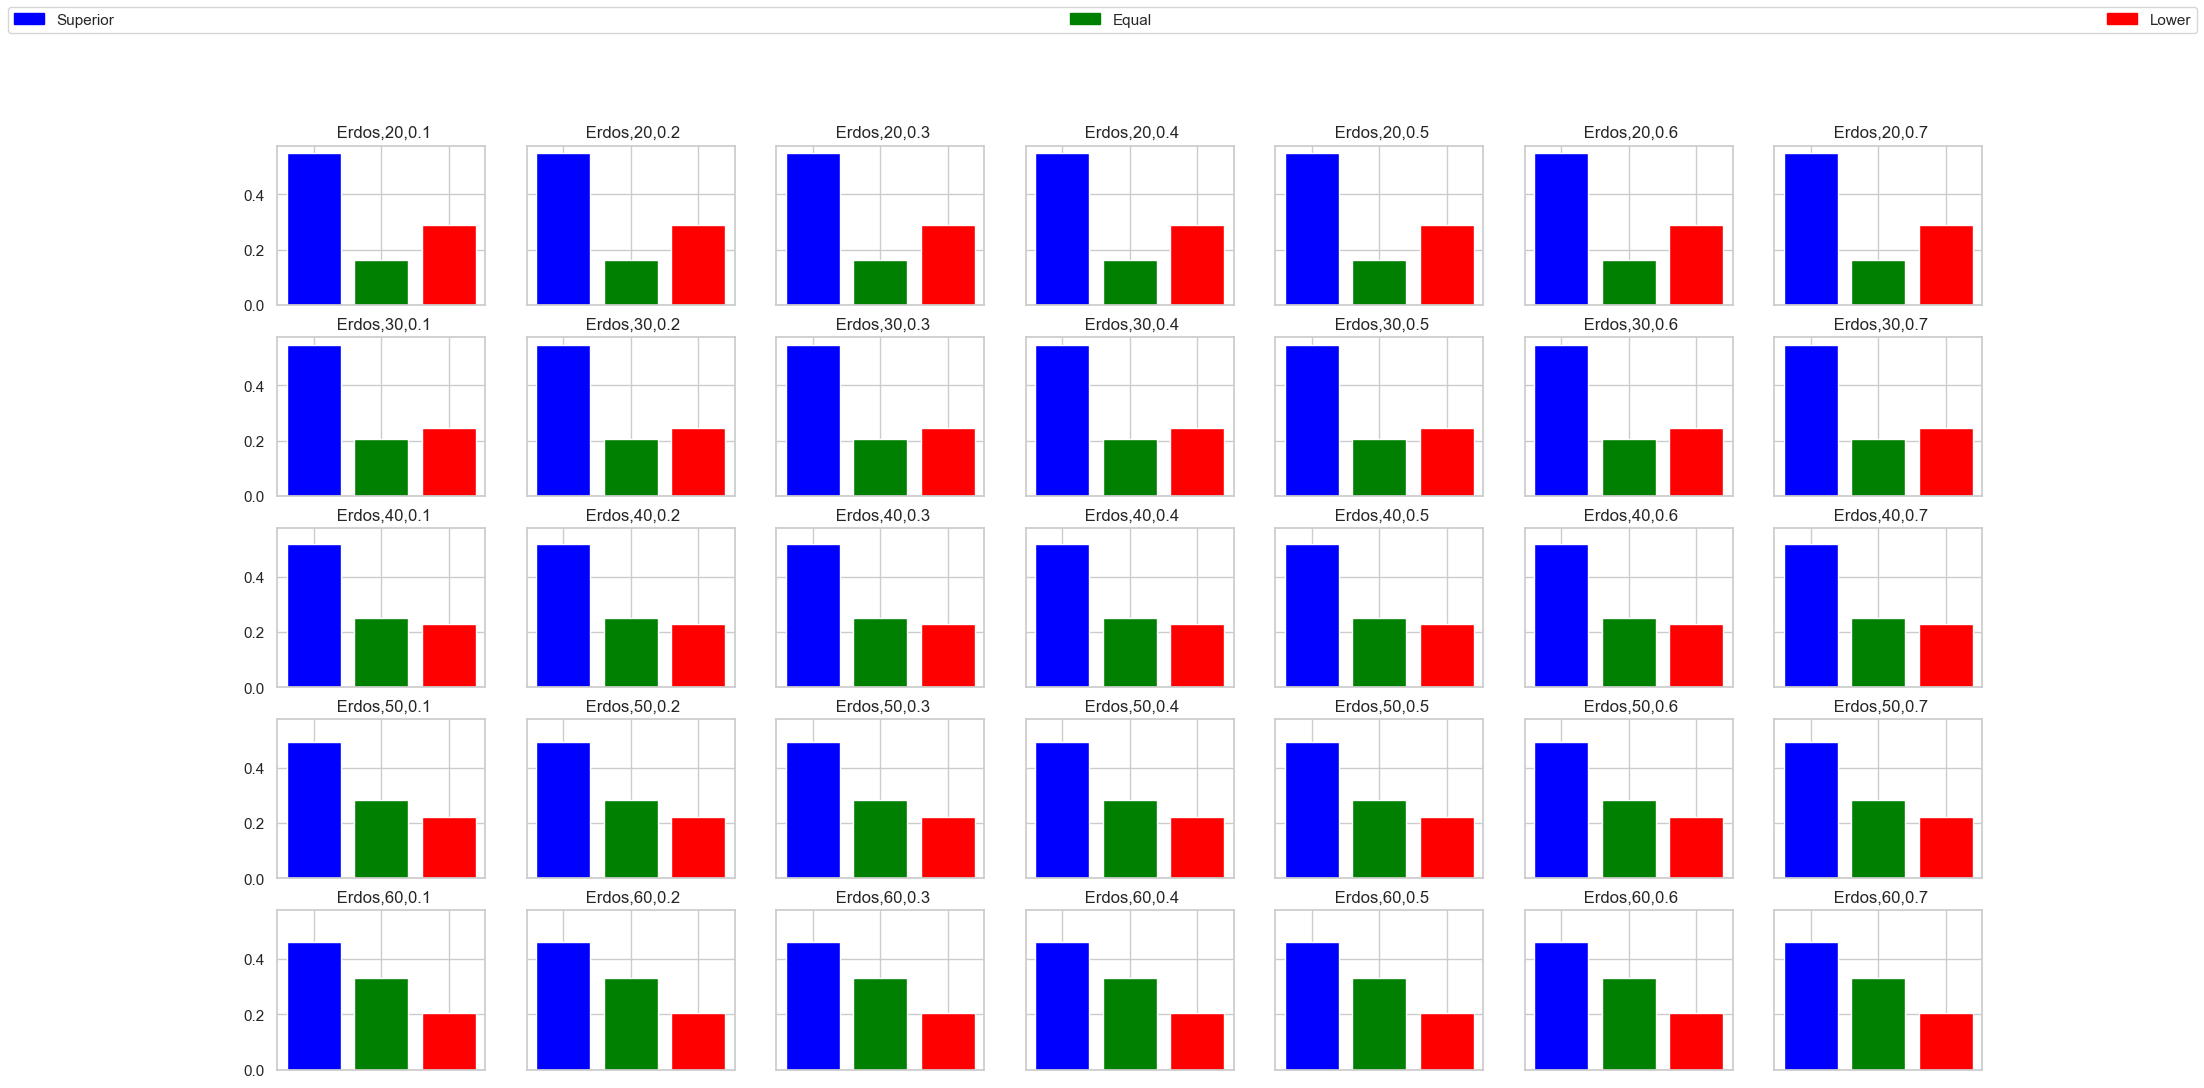

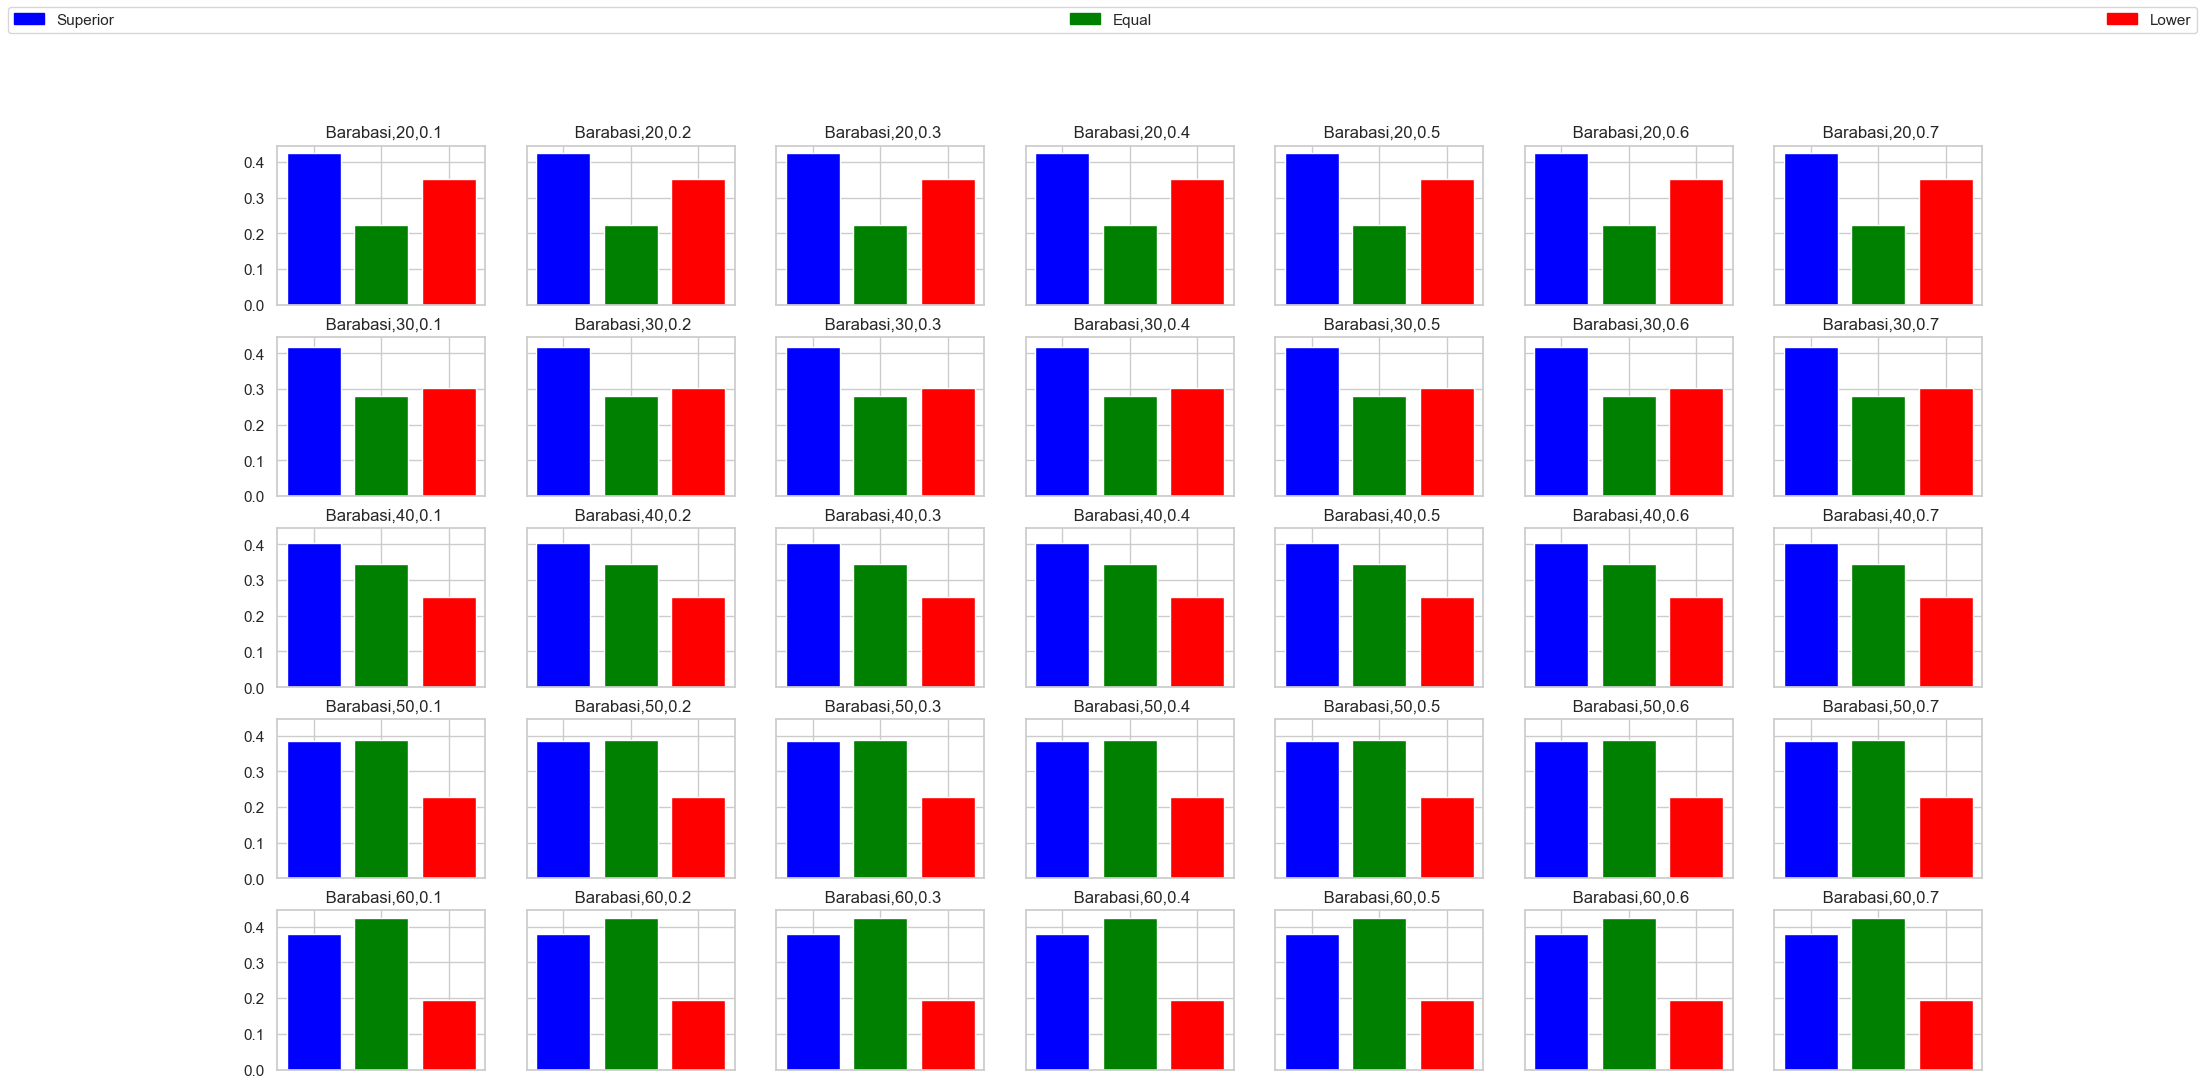

In [180]:
probs=7
nums=5
ptc=[]
colors = ["blue","green","red",]
labels=['Superior','Equal','Lower']
for color,label in zip(colors,labels):
    red_patch = mpatches.Patch(color=color, label=label)
    ptc.append(red_patch)
for gtype in ['Erdos','Barabasi']:
    fig, ax = plt.subplots(5,7,figsize=(22,12),sharey=True)
    for k,number in enumerate(range(20,70,10)):
        
        df=pd.read_csv(f'Component Gain {gtype}.csv+{number}')
        #df=pd.read_csv(f'Component Gain Erdos.csv+{70}')
        df['Connection Probability'] = list_val
        equal=df.loc[df['Edge Value Global'] == df[' Max Edge Value Comp'] ].copy()
        filtered=df.loc[df['Fraction']>0].copy()
        low=df.loc[df['Edge Value Global'] > df[' Max Edge Value Comp'] ].copy()
        low['Fraction']=(low['Span Cut'] - low['Global Cut'])/low['Global Cut']
        avlow=low['Fraction'].mean()
        for r,j in enumerate(np.linspace(0.1,0.7,7)):
            title = f" {gtype},{number},{j}"
            values=[filtered.shape[0]/df.shape[0],equal.shape[0]/df.shape[0],low.shape[0]/df.shape[0]]
            labels=['Superior','Equal','Lower']
            colors = ["blue","green","red",]
            ax[k][r].bar(x=labels, height=values, color=colors)
            ax[k][r].set_title(title)
            ax[k][r].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False
        )
    fig.legend(ptc,labels ,loc="upper left",mode="expand",ncol=3)
    plt.savefig(f'{gtype} summary graph.jpg',dpi=600)
    plt.show()
            
            

In [195]:
graph_type=[]
connection_prob=[]
sup_val=[]
numbers=[]
for k,gtype in enumerate(['Erdos','Barabasi']):

    for z,number in enumerate(range(20,70,10)):
        df=pd.read_csv(f'Component Gain {gtype}.csv+{number}')
        df['Connection Probability'] = list_val
        filtered=df.loc[df['Fraction']>0].copy()
        for r,j in enumerate(np.linspace(0.1,0.7,7)):
            frame=filtered.loc[filtered['Connection Probability']==j].copy()
            sup=frame['Fraction'].mean()
            graph_type.append(gtype)
            connection_prob.append(j)
            sup_val.append(sup)
            numbers.append(number)
            
            

In [213]:
df2=pd.DataFrame()
df2['Graph']=graph_type
df2['Prob']=connection_prob
df2['Value']=sup_val
df2['Nodes']=numbers

In [206]:
df2.head(10)

,Graph,Prob,Value,Nodes
0,Erdos,0.1,0.524450,20
1,Erdos,0.2,0.519667,20
2,Erdos,0.3,0.527356,20
3,Erdos,0.4,0.540606,20
4,Erdos,0.5,0.526674,20
5,Erdos,0.6,0.517161,20
6,Erdos,0.7,0.546808,20
7,Erdos,0.1,0.532573,30
8,Erdos,0.2,0.528585,30
9,Erdos,0.3,0.541052,30


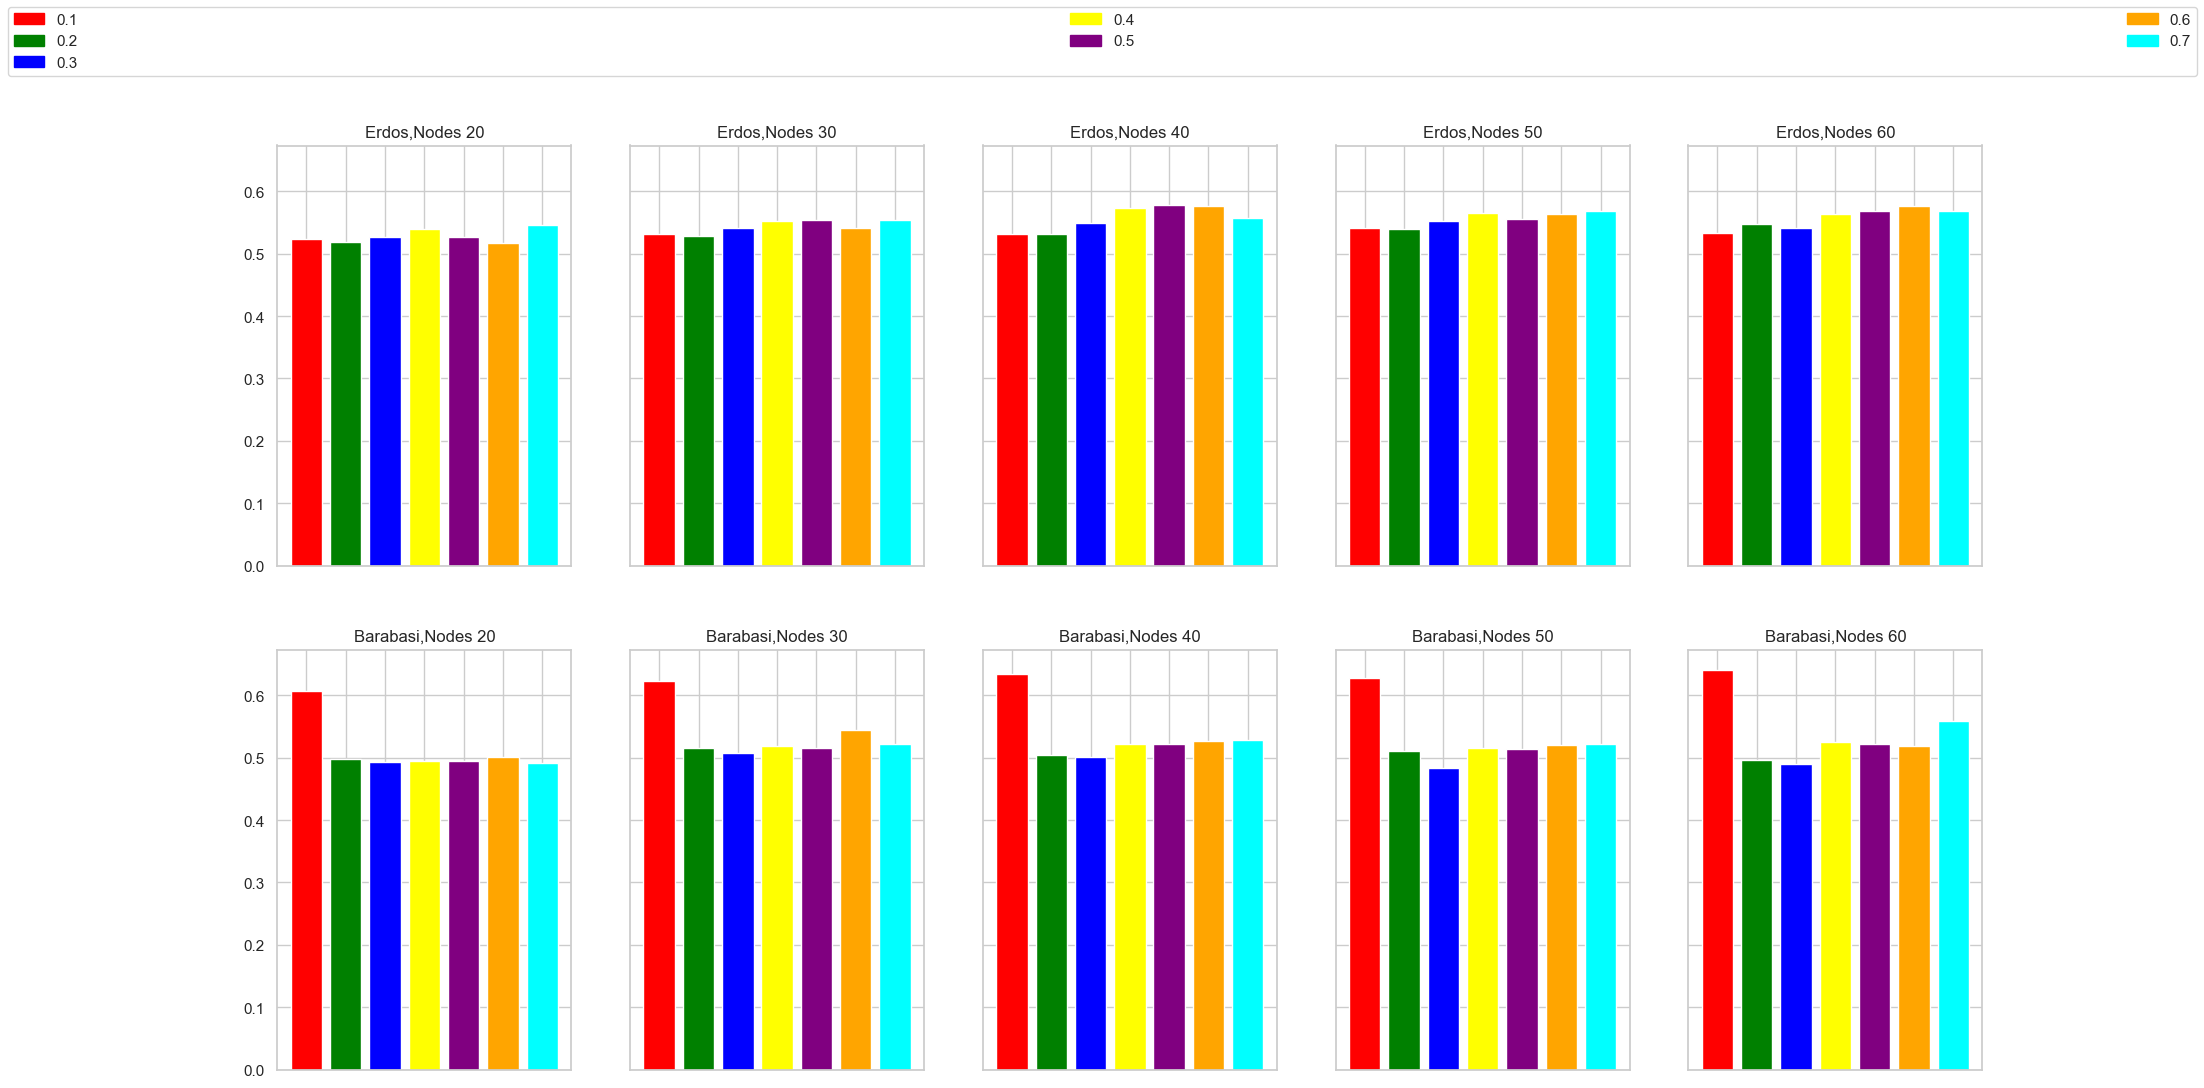

In [260]:
colors = ["red", "green", "blue", "yellow", "purple", "orange", "cyan"]
labels=['0.1','0.2','0.3','0.4','0.5','0.6','0.7']
ptc=[]
for color,label in zip(colors,labels):
    red_patch = mpatches.Patch(color=color, label=label)
    ptc.append(red_patch)
fig, ax = plt.subplots(2,5,figsize=(22,12),sharey=True)
for k,gtype in enumerate(['Erdos','Barabasi']):
    for r,number in enumerate(range(20,70,10)):
        values=df2.loc[(df2['Graph']==gtype)& (df2['Nodes']==number)]['Value'].to_list()
        title = f"{gtype},Nodes {number}"
        vals=list(values)
        ax[k][r].bar(x=labels, height=vals, color=colors)
        ax[k][r].set_title(title)
        ax[k][r].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    )
fig.legend(ptc,labels ,loc="upper left",mode="expand",ncol=3)
plt.savefig(f'Advantage summary graph.jpg',dpi=600)
plt.show()
    

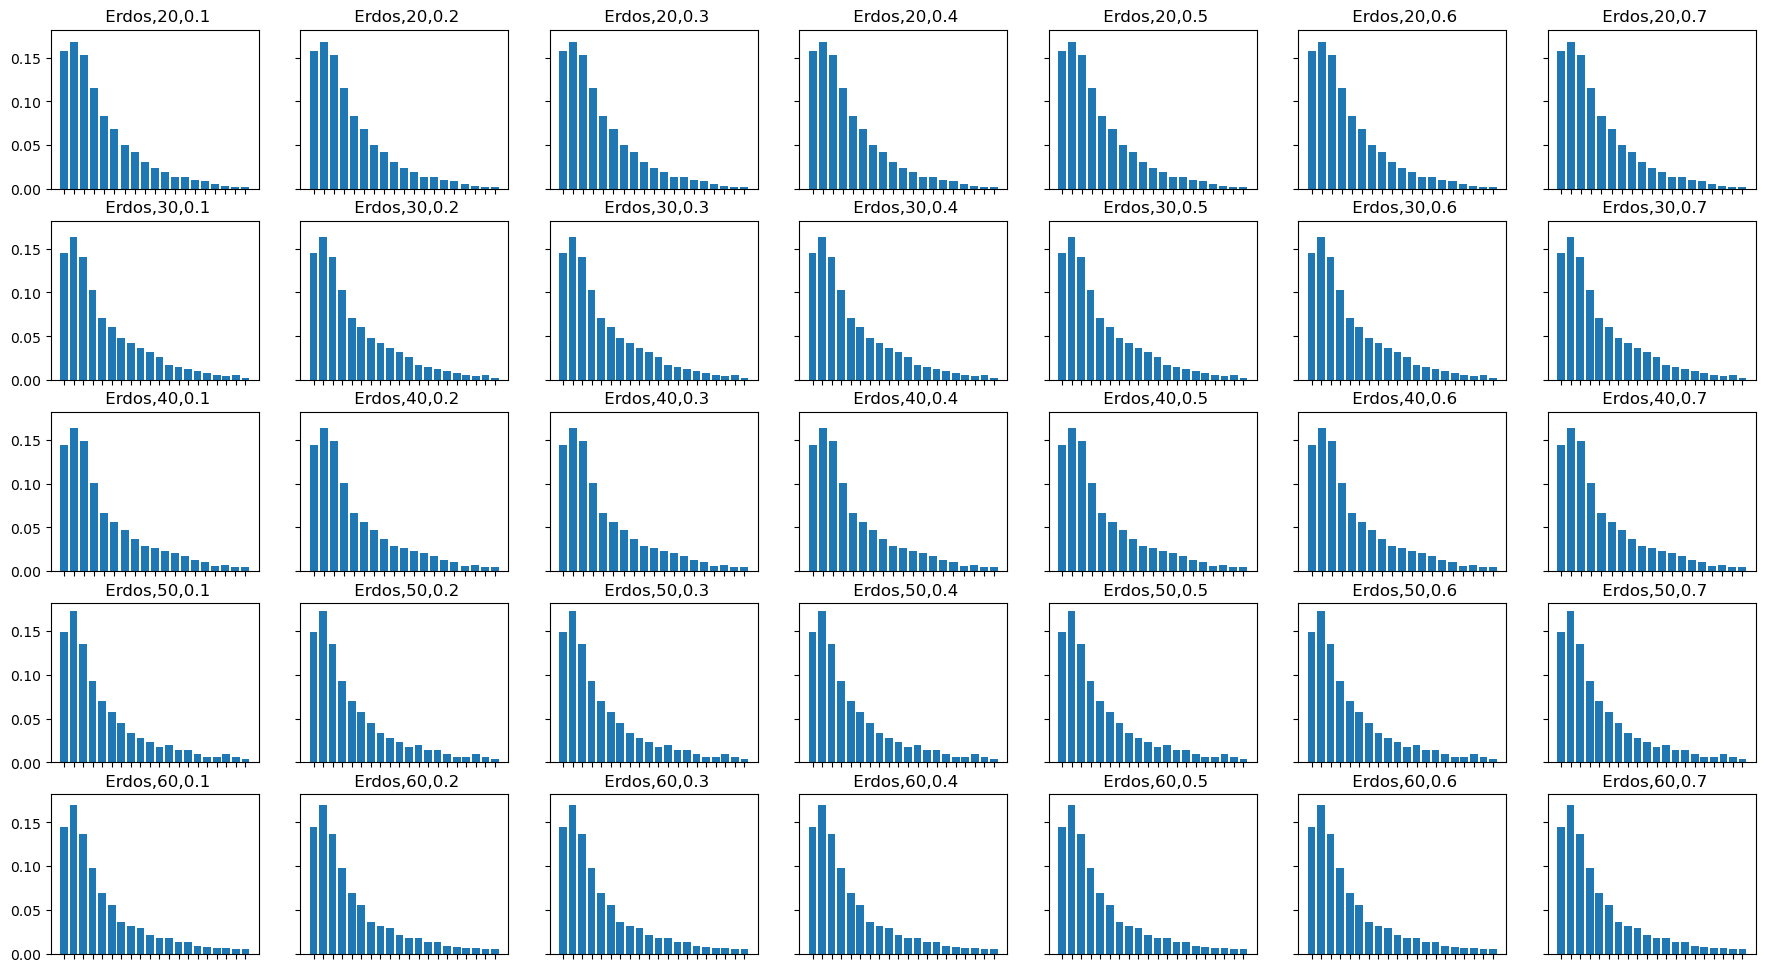

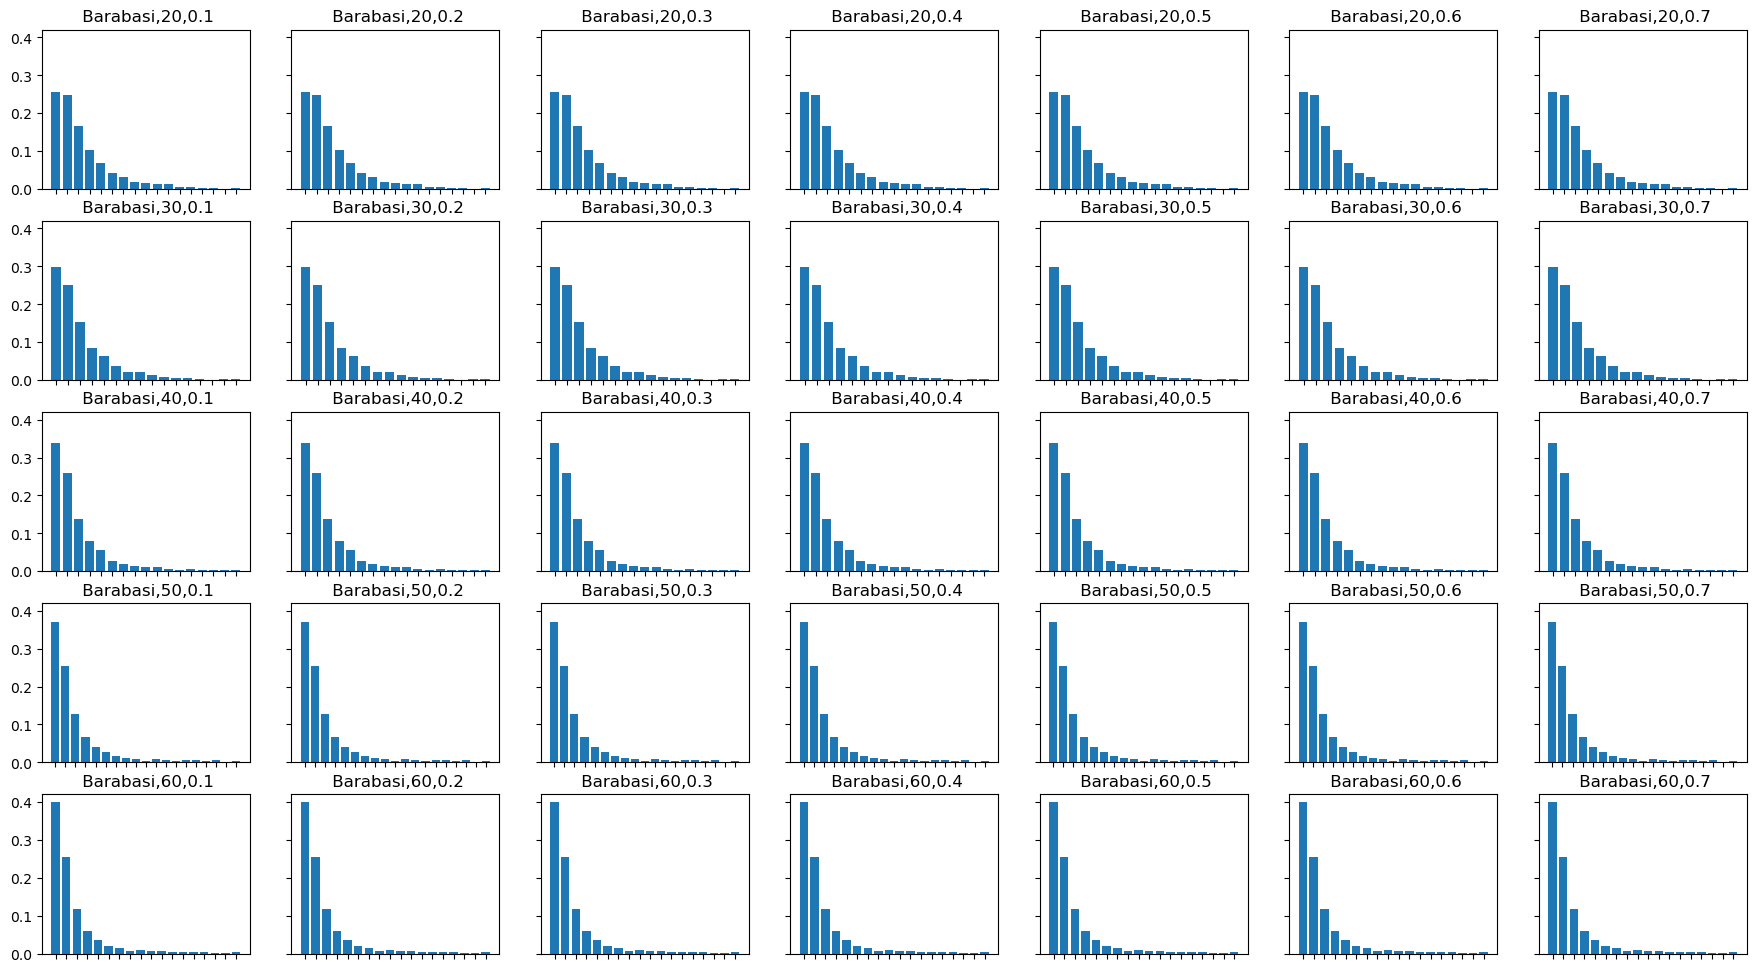

In [24]:
probs=7
nums=5
ptc=[]
#colors = ["blue","green","red",]
labels=['Superior','Equal','Lower']
for color,label in zip(colors,labels):
    red_patch = mpatches.Patch(color=color, label=label)
    ptc.append(red_patch)
for gtype in ['Erdos','Barabasi']:
    fig, ax = plt.subplots(5,7,figsize=(22,12),sharey=True)
    for k,number in enumerate(range(20,70,10)):
        
        df=pd.read_csv(f'Component Gain {gtype}.csv+{number}')
        #df=pd.read_csv(f'Component Gain Erdos.csv+{70}')
        df['Connection Probability'] = list_val
        equal=df.loc[df['Edge Value Global'] == df[' Max Edge Value Comp'] ].copy()
        filtered=df.loc[df['Fraction']>0 ].copy()
        store=[]
        for i in range(20):
            filtered_incr=filtered.loc[ filtered['Span Cut'] == filtered['Global Cut']+i].copy()
            store.append(filtered_incr.shape[0])
        for r,j in enumerate(np.linspace(0.1,0.7,7)):
            title = f" {gtype},{number},{j}"
            values=[val/filtered.shape[0] for val in store]
            labels=[str(val) for val in store]
            #colors = ["blue","green","red",]
            ax[k][r].bar(x=labels, height=values,
                         #color=colors
                        )
            ax[k][r].set_title(title)
            ax[k][r].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False
        )
    #fig.legend(ptc,labels ,loc="upper left",mode="expand",ncol=3)
    fig.subplots_adjust(wspace=0.2)
    plt.savefig(f'{gtype} extra edge graph.jpg',dpi=600)
    plt.show()
            